In [1]:
import os
from pathlib import Path
import pandas as pd
import hvplot.pandas
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

In [82]:
#Set global variables
#Prediction threshold
pred_threshold_low = 0.2
pred_threshold_high = 0.5

## Data retrieval & cleanup

In [3]:
#Get the ticker names from csv file
csvpath = Path('Resources/Tickers.csv')

ticker = pd.read_csv(csvpath, header=None)

In [4]:
etfs = ticker[0].values

In [5]:
#Function that gets the tickers from yf.
def getData(ticker):

    tickerData = yf.Ticker(ticker)    
    tickerData_history = tickerData.history(period="max")    
    tickerData_history = tickerData_history[tickerData_history.index > '2016-01-01']
        
    return tickerData_history 

In [52]:
etf_closing = pd.DataFrame()

#Loop the etfs and save the ticker closing prices into a dataframe
for etf in etfs:
        
    hist = getData(etf)
    
    etf_closing[etf] = hist["Close"]    

- ISBT: No data found, symbol may be delisted
- VQN: 1d data not available for startTime=-2208988800 and endTime=1623725809. Only 100 years worth of day granularity data are allowed to be fetched per request.


In [53]:
#Cleanup
#Get Tickers that have Nulls
nullseries = etf_closing.isnull().sum()
print(nullseries[nullseries > 0])

XGD.TO      26
ZTL.NE     313
XST.TO      26
ISBT      1371
VRE        474
BBU        103
VQN       1371
FTXR       182
FTL       1225
dtype: int64


In [54]:
tickers_dropped = nullseries[nullseries > 0].index

In [55]:
tickers_dropped

Index(['XGD.TO', 'ZTL.NE', 'XST.TO', 'ISBT', 'VRE', 'BBU', 'VQN', 'FTXR',
       'FTL'],
      dtype='object')

In [56]:
#Drop the above tickers
etf_closing.drop(tickers_dropped, axis=1, inplace=True)

In [57]:
etf_closing

,TAN,QCLN,XLE,ICLN,AMLP,VDE,XOP,IEMG,IVV,VOO,...,MCO,COMT,IYK,PSL,IEV,VDC,FSTA,KXI,RHS,PBJ
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,28.486816,15.180246,48.018921,8.680097,37.319801,69.563927,112.901924,33.545959,182.483017,166.546982,...,91.433571,23.346825,94.930428,53.006512,33.869637,111.413399,26.111456,40.190128,102.862846,29.590296
2016-01-05,28.051689,15.247247,48.202087,8.644485,37.074284,69.815010,112.530151,33.624611,182.862411,166.845139,...,92.703247,23.124161,95.268402,53.559555,33.655334,112.069267,26.295403,40.290981,103.491974,29.796633
2016-01-06,27.505468,14.873962,46.346638,8.510947,34.956619,67.103081,104.797661,33.021671,180.468475,164.730637,...,91.047974,22.579866,94.378952,53.378376,33.089546,111.597046,26.216570,39.935791,103.141457,29.684082
2016-01-07,24.987297,14.108252,45.215832,8.199352,33.084499,65.429077,102.195374,32.025513,176.150314,160.718582,...,87.201401,22.233500,92.502243,52.482071,32.489483,110.162827,25.866196,39.413944,101.766373,29.224522
2016-01-08,25.274294,14.041251,44.634518,8.119228,33.728996,64.600418,102.678673,31.719675,174.199005,159.010727,...,84.718544,22.101549,91.657280,52.205551,32.163727,109.305809,25.673492,39.098225,101.101288,29.055700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-08,76.959999,64.199997,55.990002,22.385225,37.090000,78.470001,98.300003,66.927811,422.673035,388.230011,...,336.950012,34.279999,180.572464,98.379997,54.737530,185.360001,43.279999,61.690792,165.429993,44.040001
2021-06-09,76.610001,63.540001,55.639999,22.246002,37.259998,78.059998,97.760002,66.759003,421.994995,387.619995,...,338.779999,34.160000,179.265991,96.599998,54.708004,184.220001,43.000000,61.493000,163.539993,43.520000
2021-06-10,78.720001,63.759998,55.570000,22.340000,38.230000,77.940002,96.709999,67.309998,424.040009,389.410004,...,339.959991,34.299999,179.720001,96.599998,54.869999,185.220001,43.220001,61.900002,164.229996,43.410000


In [58]:
#Get the total number of etfs
total_etfs = len(etf_closing.columns)


## Signals

In [59]:
#Trading Signal, Feature One
def signal_crossover(ticker_df):
       
    # Construct Exponential Moving Average of Closing Prices

    # Set short and long windows
    short_window = 1
    long_window = 10

    # Create a new df
    crossover_df = pd.DataFrame(index=ticker_df.index)
    
    # Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
    crossover_df['fast_close'] = ticker_df['Closing'].ewm(halflife=short_window).mean()
    crossover_df['slow_close'] = ticker_df['Closing'].ewm(halflife=long_window).mean()

    #We display some charts to show some background processes
    if etf_showcase == 1:
        # Plot Exponential Moving Average of Closing Prices
        showcase_df =  pd.DataFrame(index=ticker_df.index)
        showcase_df['Closing'] = ticker_df['Closing']
        showcase_df['fast_close'] = crossover_df['fast_close']
        showcase_df['slow_close'] = crossover_df['slow_close']

        fig, axs = plt.subplots(2,1)

        showcase_df[['Closing', 'fast_close', 'slow_close']].plot(figsize=(20,10), ax=axs[0], title='Crossover - Exponential Moving Average of Closing Prices')
    
    # Construct a crossover trading signal
    crossover_df['crossover_long'] = np.where(crossover_df['fast_close'] > crossover_df['slow_close'], 1.0, 0.0)
    crossover_df['crossover_short'] = np.where(crossover_df['fast_close'] < crossover_df['slow_close'], -1.0, 0.0)
    crossover_df['crossover_signal_temp'] = crossover_df['crossover_long'] + crossover_df['crossover_short']

    #The following ensures that we have a buy or a sell signal only when there is a switch happening.
    #If a buy or a sell signal doesn't change, we use 0 as hold as oppose to continuosly displaying buy (1) or sell (-1)    
    #The crossover_toggle column is enumerated based on the values in the crossover_signal_temp column, if a signal repeats, it will increase the enumeration until the signal changes.
    crossover_df['crossover_toggle'] = crossover_df.groupby((crossover_df['crossover_signal_temp'] != crossover_df['crossover_signal_temp'].shift(1)).cumsum()).cumcount()+1

    #The actual signal column looks at the toggle column and only grab signal values where the toggle enumeration = 1 (when the switch occurs), otherwise it gets recorded as a hold (0)
    crossover_df['crossover_signal'] = np.where(crossover_df['crossover_toggle'] == 1, crossover_df['crossover_signal_temp'], 0)
    
    #Show the signal
    if etf_showcase == 1:
        crossover_df['crossover_signal'].plot(figsize=(20, 10), ax=axs[1], title = 'Crossover Signal')
    
    return crossover_df['crossover_signal']
    
    

In [60]:
#Trading Signal, Feature Two
def signal_voltrend(ticker_df):
    
    #Construct Exponential Moving Average of Daily Return Volatility

    # Set short and long volatility windows
    short_window = 1
    long_window = 10

    # Create a new df
    voltrend_df = pd.DataFrame(index=ticker_df.index)
    
    # Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
    voltrend_df['fast_vol'] = ticker_df['Returns'].ewm(halflife=short_window).std()
    voltrend_df['slow_vol'] = ticker_df['Returns'].ewm(halflife=long_window).std()
    
    
    ### Plot Exponential Moving Average of Daily Return Volatility
    if etf_showcase == 1:        
        voltrend_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10), title='Volatility - EMA of Daily return Volatility')
    

    # Construct a vol. trend trading signal
    voltrend_df['vol_trend_long'] = np.where(voltrend_df['fast_vol'] < voltrend_df['slow_vol'], 1.0, 0.0)
    voltrend_df['vol_trend_short'] = np.where(voltrend_df['fast_vol'] > voltrend_df['slow_vol'], -1.0, 0.0) 
    voltrend_df['vol_trend_signal'] = voltrend_df['vol_trend_long'] + voltrend_df['vol_trend_short']

    return voltrend_df['vol_trend_signal']


In [114]:
#Trading Signal, Feature Three
def signal_bollinger(ticker_df):
        
    # Create a new df
    bollinger_df = pd.DataFrame(index=ticker_df.index)        
        
    #Rolling 20 day window    
    bollinger_df["closing_rollingmean20"] = ticker_df['Closing'].rolling(20).mean()
    bollinger_df["closing_rollingstd20"] = ticker_df['Closing'].rolling(20).std()

    if etf_showcase == 1:
        fig, axs = plt.subplots(2,1)
        showcase_df =  pd.DataFrame(index=ticker_df.index)
        showcase_df['Closing'] = ticker_df['Closing']
        showcase_df['closing_rollingmean20'] = bollinger_df['closing_rollingmean20']
        showcase_df['closing_rollingstd20'] = bollinger_df['closing_rollingstd20']
        
        showcase_df[["Closing","closing_rollingmean20", "closing_rollingstd20"]].plot(figsize=(20, 10), ax=axs[0], title='Bollinger - Rolling 20 day window')
        
        
    #Have the bands at * 2
    bollinger_df["closing_bollinger_upper"] = bollinger_df["closing_rollingmean20"] + (bollinger_df["closing_rollingstd20"] * 2)
    bollinger_df["closing_bollinger_lower"] = bollinger_df["closing_rollingmean20"] - (bollinger_df["closing_rollingstd20"] * 2)

    if etf_showcase == 1:
        showcase_df['closing_bollinger_upper'] = bollinger_df["closing_bollinger_upper"]
        showcase_df["closing_bollinger_lower"] = bollinger_df["closing_bollinger_lower"]
        
        showcase_df[["Closing","closing_bollinger_upper", "closing_bollinger_lower"]].plot(figsize=(20, 10), ax=axs[1], title='Bollinger - Upper and Lower bands')
    

    ##Buying
    bollinger_df["bollinger_long"] = np.where(ticker_df["Closing"] < bollinger_df["closing_bollinger_lower"], 1, 0)

    ##Selling
    bollinger_df["bollinger_short"] = np.where(ticker_df["Closing"] > bollinger_df["closing_bollinger_upper"], -1, 0)

    bollinger_df["bollinger_signal"] = bollinger_df["bollinger_long"] + bollinger_df["bollinger_short"]


    return bollinger_df["bollinger_signal"]
    

## Random Forest Regressor

In [64]:
def rfr_model(ticker_df, covid_columns):
    
    features = []
    if toggle_covid == 1:                
        #Add the covid features
        features = covid_columns        
    
    #Add the signal features
    features.append('crossover_signal')
    features.append('voltrend_signal')
    features.append('bollinger_signal')
        
    # Features
    X = ticker_df[features]
    # Target
    y = ticker_df['Positive Return']
    
    # Instantiate model with 1000 decision trees
    rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    # Train the model on feature and target data
    rf.fit(X, y);
        
    predictions = rf.predict(X)

    return predictions
    

## Helper Functions

In [65]:
#Main function that builds the signals and fits the model and makes the prediction
def build_model(ticker_df, ticker_name):
    
    #Get returns
    ticker_df['Returns'] = ticker_df.pct_change()
        
    #Gather Signals
    #1) Crossover signal
    ticker_df['crossover_signal'] = signal_crossover(ticker_df)
    
    #Cleanup - Drop nulls
    ticker_df.dropna(inplace=True)
    
    #2) Volatility trend signal
    ticker_df['voltrend_signal'] = signal_voltrend(ticker_df)
    
    #3) Bollinger band signal
    ticker_df['bollinger_signal'] = signal_bollinger(ticker_df)
    
    #Positive return
    ticker_df['Positive Return'] = np.where(ticker_df['Returns'] > 0, 1.0, 0.0)

    #Check whether to include COVID data
    covid_columns = []
    if toggle_covid == 1:
        
        #Get the covid data
        covid_data = build_covid_df()
        
        covid_columns = list(covid_data.columns)
        
        #Concat covid data
        ticker_df = pd.concat([ticker_df, covid_data], axis='columns', join='outer')                    
            
        #Cleanup the merged df        
        #Drop the non-trading days that were introduced due to the outer join with covid data. These can be found by searching for nulls under the Closing column.
        ticker_df = ticker_df.dropna(axis=0, subset=['Closing'])

        #Fill non existing covid data with 0
        ticker_df = ticker_df.fillna(0)
    
    
    #Random forest regressor
    ticker_df['predictions_raw'] = rfr_model(ticker_df, covid_columns)
    
    #Assign threshold to predictions to determine buy, sell or hold.  
    ticker_df['Prediction'] = ticker_df['predictions_raw'].apply(assign_threshold)
            
    return ticker_df    

In [66]:
#Function that simulates buy, sell and hold actions based on prediction
def calculate_investment(predicted_df, wallet_weight):
        
    #Number of stocks that will be bought based on equity and given closing price
    num_stocks = 0    
    constant_num_stocks = 0
    investment_equity = 0
    
    wallet_history = []
    equity_history = []
    num_stocks_history = []
    buyhold_equity_history = []
    
    #Set the initial wallet determined for this investment.
    investment_wallet = main_wallet * wallet_weight    
    
    #Set a buy and hold equity, for comparison.
    buyhold_equity = investment_wallet
            
    #Get the total number of trading days
    trading_days = len(predicted_df)
    
    # Create a new df
    investment_df = pd.DataFrame(index=predicted_df.index)     
        
    for i in range(0,trading_days):
                        
        #If we have no equity in the stock and a sell signal is detected.
        if investment_equity <= 0 and predicted_df['Prediction'].iloc[i] == 'sell':
            
            #Not much to do, skip.
            pass

        #If we have equity in the stock and a sell signal is detected.
        elif investment_equity > 0 and predicted_df['Prediction'].iloc[i] == 'sell':
            
            #Sell the stocks
            investment_wallet = investment_equity
            investment_equity = investment_equity - investment_wallet
            
            num_stocks = 0
        
        #If we have money in our wallet and a buy signal is detected
        elif investment_wallet > 0 and predicted_df['Prediction'].iloc[i] == 'buy':
            
            #Buy the stocks
            investment_equity = investment_wallet
            investment_wallet = investment_wallet - investment_equity
            
            num_stocks = investment_equity / predicted_df['Closing'].iloc[i]
            
        #If we don't have money in our wallet and a buy signal is detected
        elif investment_wallet <= 0 and predicted_df['Prediction'].iloc[i] == 'buy':
            
            #Not much to do, hold.
            pass
            
        #After running through the signals, update the equity amount
        if num_stocks > 0:            
            investment_equity = num_stocks * predicted_df['Closing'].iloc[i]
    
        
        
        #Set buy and hold amount which we will buy and hold from the beginning to the end, for comparison.
        if i == 0:
            constant_num_stocks = buyhold_equity / predicted_df['Closing'].iloc[i]

        buyhold_equity = constant_num_stocks * predicted_df['Closing'].iloc[i]
    
    
        wallet_history.append(investment_wallet)
        equity_history.append(investment_equity)
        num_stocks_history.append(num_stocks)
        buyhold_equity_history.append(buyhold_equity)
        
        
    #Store the transaction history
    investment_df['wallet'] = wallet_history
    investment_df['equity'] = equity_history
    investment_df['num_stocks'] = num_stocks_history    
    investment_df['buyholdequity'] = buyhold_equity_history
    
    #Return the investment history
    return investment_df
    

In [67]:
def assign_threshold(x):
    
    if x < pred_threshold_low:        
        return 'sell'    
    elif x >= pred_threshold_low and x < pred_threshold_high:        
        return 'hold'    
    else:                
        return 'buy'

## The COVID-19 variable

In [68]:
#Gathers the data from the CSV files and filters to US data only.
def getCovidData(csv):
    
    csvpath = Path('Resources/COVID_Data/' + csv)
    data = pd.read_csv(csvpath, index_col="Day")
    
    cleaned_data = data.loc[data['Code'] == 'USA'].drop(columns=['Entity', 'Code'])
    
    return cleaned_data

In [69]:
#Builds the dataframe and does cleanup
def build_covid_df():

    testing_pol = getCovidData('covid-19-testing-policy.csv')
    contact_tr = getCovidData('covid-contact-tracing.csv')
    vax_pol = getCovidData('covid-vaccination-policy.csv')
    debt_relief = getCovidData('debt-relief-covid.csv')
    face_cover = getCovidData('face-covering-policies-covid.csv')
    income_support = getCovidData('income-support-covid.csv')
    internal_mov = getCovidData('internal-movement-covid.csv')
    int_travel = getCovidData('international-travel-covid.csv')
    public_camp = getCovidData('public-campaigns-covid.csv')
    public_events = getCovidData('public-events-covid.csv')
    public_gather = getCovidData('public-gathering-rules-covid.csv')
    public_trans = getCovidData('public-transport-covid.csv')
    stay_home = getCovidData('stay-at-home-covid.csv')
    work_close = getCovidData('workplace-closures-covid.csv')
    school_close = getCovidData('school-closures-covid.csv')
    stringency = getCovidData('covid-stringency-index.csv')

    covid_data = pd.concat([testing_pol, contact_tr, vax_pol, debt_relief, face_cover, income_support, internal_mov,
                           int_travel, public_camp, public_events, public_gather, public_trans, stay_home, work_close,
                           school_close, stringency
                           ], axis="columns", join="outer")


    #Replace nulls with 0s, in this case Null values are where there is either no data or N/A hence, 0.
    covid_data['school_closures'] = covid_data['school_closures'].fillna(0)
    covid_data['stringency_index'] = covid_data['stringency_index'].fillna(0)    
    
    #Set index as datetime so it could be merged with the rest of the ETF features.    
    covid_data.index = pd.to_datetime(covid_data.index)
    
    return covid_data

In [70]:
# We start with a $10,000 wallet. (10% of $10,000 ($1000) will be invested into each ETF for simulation purposes)
main_wallet = 10000

## Portfolio builder

In [130]:
#COVID-19 data features
#Disabled = 0, Enabled = 1
toggle_covid = 0

#ETF show case mode. When enabled, it assumes a single ETF is being presented and it will display charts.
etf_showcase = 0

In [131]:
portfolio_results = []
total_final_ml_equity = 0
total_final_buyhold_equity = 0

#Loops through all ETFs, builds prediction models and simulates buy, sell and hold signals
for i in range(0, total_etfs):
#for i in range(50, 51):
    
    ticker_name = etf_closing.columns[i]
    
    ticker_df = pd.DataFrame()    
    #predicted_df = pd.DataFrame()    
    
    ticker_df['Closing'] = etf_closing.iloc[:,i]
    
    #Build model and get predictions.
    predicted_df = build_model(ticker_df, ticker_name)
    
    #Simulate an investment portfolio based on predictions.
    #For now we assume we invest $1000 to each ETF.
    investment_df = calculate_investment(predicted_df, 0.1)
        
    portfolio_df = pd.concat([predicted_df, investment_df], axis='columns', join='inner')                    
    
    #Get the final value of equity or wallet from the dataframe    
    final_equity = np.where(portfolio_df['equity'][portfolio_df.index[-1]] > 0, portfolio_df['equity'][portfolio_df.index[-1]], portfolio_df['wallet'][portfolio_df.index[-1]])
    
    #Buy and hold equity for comparison.
    final_buyhold_equity = portfolio_df['buyholdequity'][portfolio_df.index[-1]]
    
    portfolio_results.append([ticker_name, final_equity, final_buyhold_equity])
            
    display([ticker_name, float(final_equity), final_buyhold_equity])
    #display(portfolio_df.tail(50))
    
    total_final_ml_equity += float(final_equity)
    total_final_buyhold_equity += final_buyhold_equity
    

print(f'The total amount of equity using the trading suggestions of the regressor: {total_final_ml_equity}')
print(f'The total amount of equity with a buy and hold strategy: {total_final_buyhold_equity}')
        

['TAN', 9558.462305432055, 2879.6839417851056]

['QCLN', 24060.699162193803, 4261.097253753886]

['XLE', 5846.501841683726, 1143.9338493661862]

['ICLN', 6256.226011547738, 2637.519817916224]

['AMLP', 6196.700957598278, 1037.3767299073209]

['VDE', 6006.812521017825, 1108.9305593515228]

['XOP', 11160.508158835555, 855.6817861315382]

['IEMG', 5995.313868924756, 2002.1049431107188]

['IVV', 4863.997518516457, 2328.3079681353693]

['VOO', 4854.601416421336, 2343.910111636133]

['USRT', 5811.399469531584, 1573.3568177700936]

['AACG', 6614.031474080875, 5173.417110726825]

['DGRO', 4209.138000456718, 2255.059762311887]

['IEFA', 2731.471417263232, 1683.7854857397551]

['SPY', 4795.796448491041, 2333.702049767508]

['IYR', 6788.542818931399, 1670.9987484610956]

['VNQ', 5727.720258063338, 1632.79357528781]

['SCHH', 3205.054551512157, 1371.3147495784299]

['XLRE', 5674.80370026806, 1753.172654853464]

['IWM', 9641.927707828268, 2250.8116010673575]

['GLD', 3430.52309328472, 1693.2545667486615]

['QQQ', 7143.322679547524, 3292.4982593490763]

['VEA', 2898.9892999100152, 1715.2284379885975]

['VGT', 10332.298480738342, 3875.539305458237]

['VUG', 6275.400719307087, 2821.641030743841]

['SCHA', 9142.730941315678, 2212.6640048939007]

['USMV', 3801.7780573591717, 1966.7045587279558]

['HDV', 3447.0064028790416, 1633.690777929421]

['GDX', 3866.605826242125, 2790.896229204671]

['VAW', 6407.856048841345, 2222.7625606610595]

['XME', 17584.84263532038, 3326.4142094299505]

['PICK', 14068.47897317024, 3378.062258756949]

['COPX', 22359.349762751317, 3706.007546332658]

['VEU', 5288.138208398822, 1775.061964150776]

['VWO', 5970.579963903645, 1969.1029413777528]

['WPP', 3044.1193640777415, 813.0434397218362]

['OMC', 6912.5045320336085, 1339.3374863801437]

['TAL', 32145.563138397174, 3935.3009752628263]

['IPG', 10149.3033886984, 1780.3844549885544]

['VIS', 6001.703898725884, 2172.056858985667]

['JETS', 3893.1211482000053, 1123.11766303341]

['ITA', 8109.984483574658, 2008.5021216388848]

['IYJ', 6523.394240151007, 2345.9736248920044]

['FXR', 6329.119977767085, 2411.546147868827]

['XAR', 8266.93691057844, 2670.261624530012]

['FIDU', 4589.42804715936, 2214.757456388566]

['PPA', 7077.745244773776, 2286.7406330606404]

['CORN', 1653.4781669845308, 1020.086087009031]

['USO', 9965.141061851038, 566.6041321116281]

['DBB', 2724.7483121764767, 1848.8425007792534]

['SPGI', 10393.299903527184, 4414.155508789268]

['MCO', 12559.605714775666, 3751.3250156368304]

['COMT', 3885.5901987704924, 1477.6751690075323]

['IYK', 4228.149424133586, 1890.8578668088942]

['PSL', 4411.04195032053, 1790.156717270466]

['IEV', 4573.388303882761, 1638.3732401901311]

['VDC', 2774.7063848431894, 1651.8355087155187]

['FSTA', 3160.3191569447918, 1644.3939823437129]

['KXI', 3052.0991930553137, 1536.0757520399234]

['RHS', 3465.9134357627863, 1585.7847827849819]

['PBJ', 3368.514761428417, 1452.177526115866]

The total amount of equity using the trading suggestions of the regressor: 435276.5310441617
The total amount of equity with a buy and hold strategy: 132045.85444476616


In [92]:
from operator import itemgetter

#Get top 10 highest return ETFs
topten_etfs = sorted(portfolio_results, key=itemgetter(1), reverse=True)[:10]
topten_df = pd.DataFrame(topten_etfs, columns=[['ETF', 'Returns', 'BuyHold_Returns']])

In [89]:
#With COVID features (display only)
topten_df

,ETF,Returns,BuyHold_Returns
0,AACG,112453.82186381813,5173.417111
1,TAL,43024.797395017085,3935.300975
2,COPX,31368.80144661776,3706.007546
3,XME,28315.32590508921,3326.414209
4,QCLN,27539.004293504415,4261.097254
5,TAN,16055.12639613393,2879.683942
6,SPGI,15820.020532867959,4414.155509
7,GDX,15582.16037103959,2790.896229
8,XOP,15537.43154434459,855.681786
9,MCO,13064.3117530918,3751.325016


In [93]:
#Without COVID features (display only)
topten_df

,ETF,Returns,BuyHold_Returns
0,TAL,32145.563138397174,3935.300975
1,QCLN,24060.699162193803,4261.097254
2,COPX,22359.349762751317,3706.007546
3,XME,17584.84263532038,3326.414209
4,PICK,14068.47897317024,3378.062259
5,MCO,12559.605714775666,3751.325016
6,XOP,11160.508158835555,855.681786
7,SPGI,10393.299903527184,4414.155509
8,VGT,10332.298480738342,3875.539305
9,IPG,10149.3033886984,1780.384455


## Showcasing an ETF - with COVID data

,Closing,Returns,crossover_signal,voltrend_signal,bollinger_signal,Positive Return,testing_policy,contact_tracing,vaccination_policy,debt_relief,...,stay_home_requirements,workplace_closures,school_closures,stringency_index,predictions_raw,Prediction,wallet,equity,num_stocks,buyholdequity
2016-01-05,89.795204,0.003375,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.970240,buy,0.0,1000.000000,11.136452,1000.000000
2016-01-06,88.813446,-0.010933,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.027007,sell,1000.0,0.000000,0.000000,989.066698
2016-01-07,86.019112,-0.031463,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.563798,buy,0.0,1000.000000,11.625324,957.947726
2016-01-08,83.555260,-0.028643,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.563798,buy,0.0,971.356924,11.625324,930.509157
2016-01-11,83.517471,-0.000452,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.505413,buy,0.0,970.917622,11.625324,930.088328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-08,384.390015,0.008289,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.563798,buy,0.0,15341.872491,39.912256,4280.741029
2021-06-09,384.609985,0.000572,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.563798,buy,0.0,15350.652018,39.912256,4283.190722
2021-06-10,386.730011,0.005512,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.563798,buy,0.0,15435.267023,39.912256,4306.800286
2021-06-11,392.489990,0.014894,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,buy,0.0,15665.160786,39.912256,4370.946020


<AxesSubplot:title={'center':'SPGI - Comparison: Machine Learning vs Buy and Hold - With COVID Features'}>

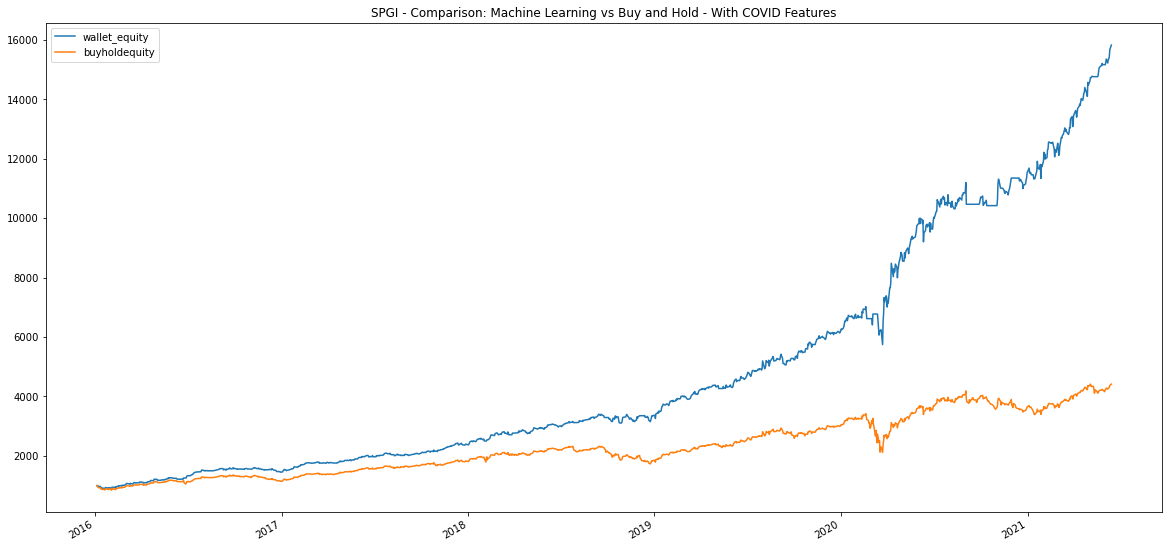

In [128]:
#Showcasing SPGI (at index 50 in our list of ETFs)

toggle_covid = 1
etf_showcase = 0
showcase_ticker_name = 'SPGI'

# ticker_name = etf_closing.columns[50]

ticker_df = pd.DataFrame()    
#predicted_df = pd.DataFrame()    

ticker_df['Closing'] = etf_closing[showcase_ticker_name]

#Build model and get predictions.
predicted_df = build_model(ticker_df, showcase_ticker_name)

#Simulate an investment portfolio based on predictions.
#For now we assume we invest $1000 to each ETF.
investment_df = calculate_investment(predicted_df, 0.1)

portfolio_df = pd.concat([predicted_df, investment_df], axis='columns', join='inner')                    

#Get the final value of equity from the dataframe    
#final_equity = portfolio_df['equity'][portfolio_df.index[-1]]

#portfolio_results.append([ticker_name, final_equity])      

#Export to CSV
portfolio_df.to_csv(showcase_ticker_name + '_Algo_Trading_with_COVID.csv')

display(portfolio_df)

#Have a column that takes equity if wallet = 0 and vice versa. This is to compare ml results with buy and hold results
portfolio_df['wallet_equity'] = np.where(portfolio_df['wallet'] > 0, portfolio_df['wallet'], portfolio_df['equity'])

#Show the progression of the inital $1000 invested.
portfolio_df[["wallet_equity","buyholdequity"]].plot(figsize=(20, 10), title=showcase_ticker_name + ' - Comparison: Machine Learning vs Buy and Hold - With COVID Features')


## Showcasing an ETF - without COVID data

,Closing,Returns,crossover_signal,voltrend_signal,bollinger_signal,Positive Return,predictions_raw,Prediction,wallet,equity,num_stocks,buyholdequity
Date,,,,,,,,,,,,
2016-01-05,89.795204,0.003375,1.0,0.0,0,1.0,0.976252,buy,0.0,1000.000000,11.136452,1000.000000
2016-01-06,88.813446,-0.010933,-1.0,0.0,0,0.0,0.019874,sell,1000.0,0.000000,0.000000,989.066698
2016-01-07,86.019112,-0.031463,0.0,1.0,0,0.0,0.558618,buy,0.0,1000.000000,11.625324,957.947726
2016-01-08,83.555260,-0.028643,0.0,1.0,0,0.0,0.558618,buy,0.0,971.356924,11.625324,930.509157
2016-01-11,83.517471,-0.000452,0.0,-1.0,0,0.0,0.495814,hold,0.0,970.917622,11.625324,930.088328
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-08,384.390015,0.008289,0.0,1.0,0,1.0,0.558618,buy,0.0,10079.170349,26.221208,4280.741029
2021-06-09,384.609985,0.000572,0.0,1.0,0,1.0,0.558618,buy,0.0,10084.938247,26.221208,4283.190722
2021-06-10,386.730011,0.005512,0.0,1.0,0,1.0,0.558618,buy,0.0,10140.527879,26.221208,4306.800286


<AxesSubplot:title={'center':'SPGI - Comparison: Machine Learning vs Buy and Hold - No COVID Features'}, xlabel='Date'>

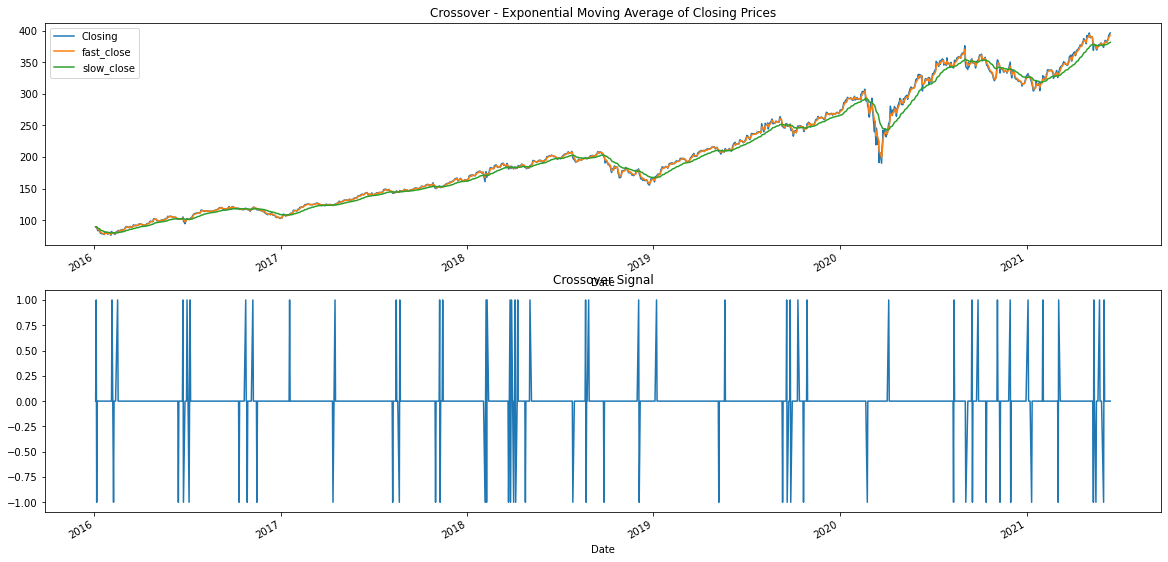

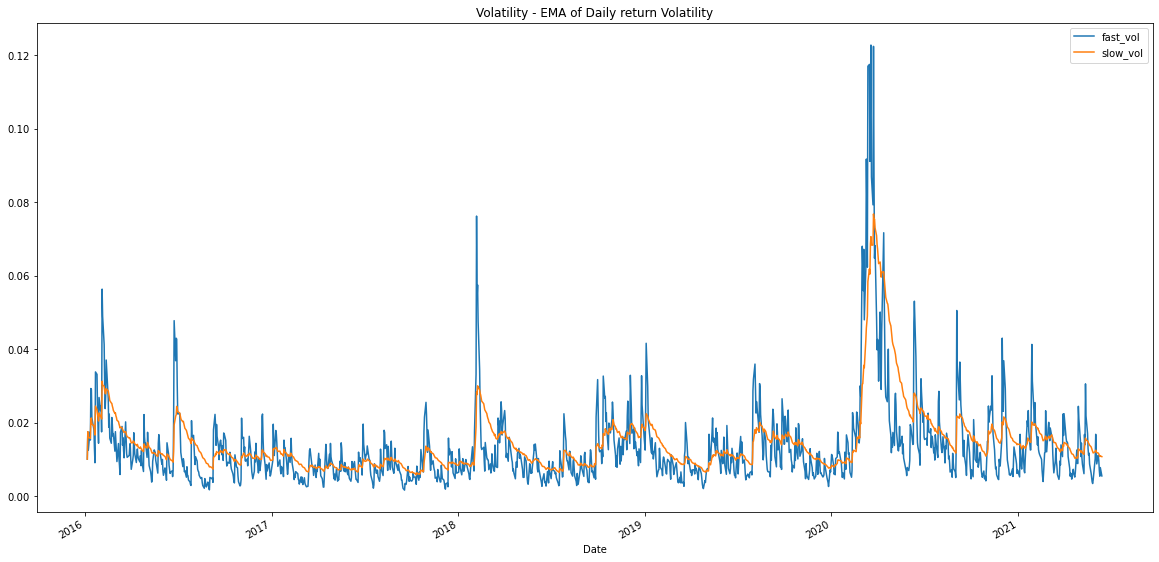

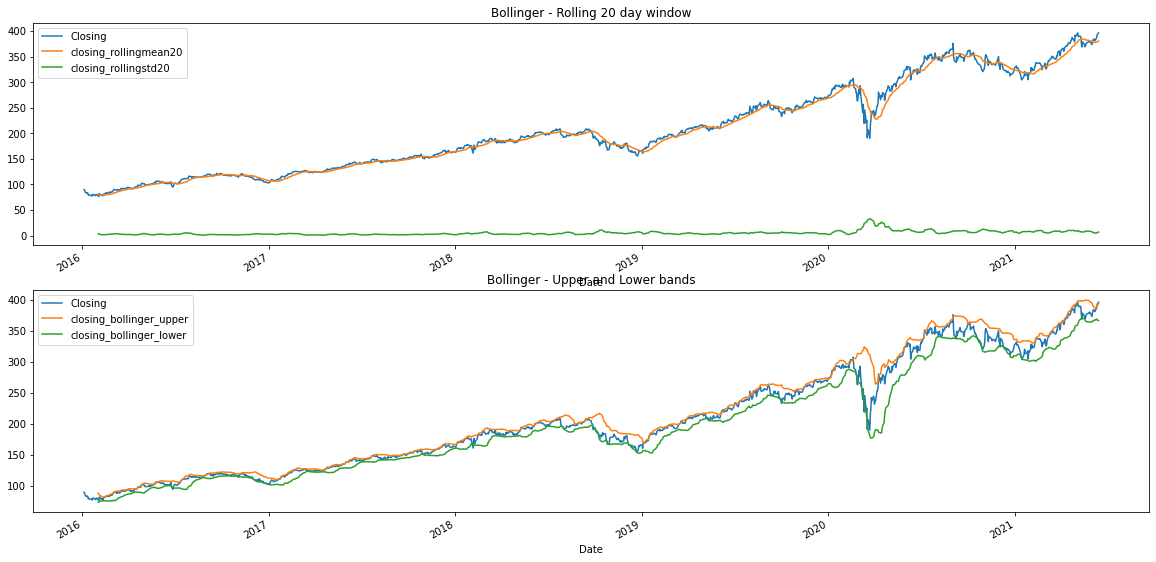

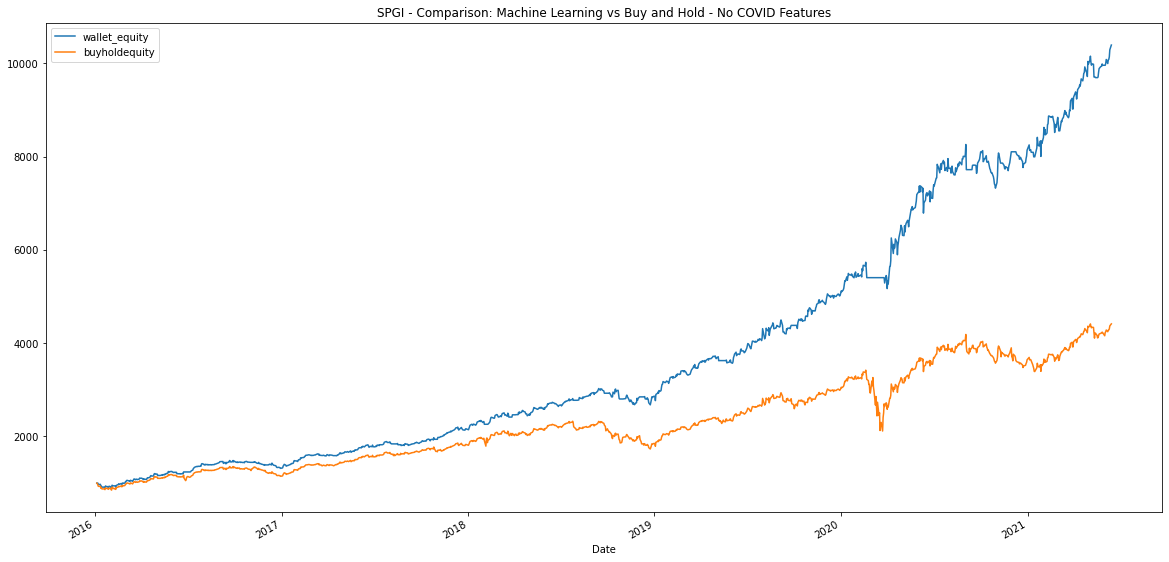

In [129]:
#Showcasing a single ticker

toggle_covid = 0
etf_showcase = 1
showcase_ticker_name = 'SPGI'

#ticker_name = etf_closing.columns[50]

ticker_df = pd.DataFrame()    
#predicted_df = pd.DataFrame()    

ticker_df['Closing'] = etf_closing[showcase_ticker_name]

#Build model and get predictions.
predicted_df = build_model(ticker_df, showcase_ticker_name)


#Simulate an investment portfolio based on predictions.
#For now we assume we invest $1000 to each ETF.
investment_df = calculate_investment(predicted_df, 0.1)

portfolio_df = pd.concat([predicted_df, investment_df], axis='columns', join='inner')                    

#Get the final value of equity from the dataframe    
#final_equity = portfolio_df['equity'][portfolio_df.index[-1]]

#portfolio_results.append([ticker_name, final_equity])       

#Export to CSV
portfolio_df.to_csv(showcase_ticker_name + '_Algo_Trading_without_COVID.csv')


display(portfolio_df)


#Have a column that takes equity if wallet = 0 and vice versa. This is to compare ml results with buy and hold results
portfolio_df['wallet_equity'] = np.where(portfolio_df['wallet'] > 0, portfolio_df['wallet'], portfolio_df['equity'])



#Show the progression of the inital $1000 invested.
portfolio_df[["wallet_equity","buyholdequity"]].plot(figsize=(20, 10), title=showcase_ticker_name + ' - Comparison: Machine Learning vs Buy and Hold - No COVID Features')



# Conclusion: 
### We see some significant increases in equity, when applying the trading suggestions given to us by the regressor as opposed to buying the stocks from the beginning and holding on, during the same time frame.

### In addition, we have made even more money by including COVID features into our machine learning model. This data has perhaps helped us by finding correlations between the COVID policies and the stock performance, hence making much better trading suggestions that improved the profits.

### I would definitely recommend this strategy of trading to anyone willing to reap the benefits of machine learning when it comes to trading.